In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()



Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder,MinMaxScaler
from keras.utils import to_categorical
#import tensorflow as tf
from tensorflow import keras

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
   for filename in filenames:
      print(os.path.join(dirname, filename))

1. LOAD AND CHECK DATA 

In [ ]:
#con esto no da ya que esta delimitado por ",": data = pd.read_csv("C:/Users/Jhan/OneDrive/Escritorio/UNASAM (JHAN)/2024-0/TEORIA DE DESICIONES/nuevoexel.csv")

In [12]:
data = pd.read_csv("C:/Users/Jhan/OneDrive/Escritorio/UNASAM (JHAN)/2024-0/TEORIA DE DESICIONES/nuevoexel.csv", sep=';')

In [13]:
data.head()

,devicetime,latitude,longitude,ac_lat,angle_volante,yaw_rate,rpm,score,anomaly,anomaly_data
0,2022-12-04 00:32:58.000,-226073033,-688120083,0.39,0.22,0.0,1338,8690032754,0,No
1,2022-12-04 00:32:59.000,-226068333,-688119233,-0.53,0.16,0.0,1341,10247354139,0,No
2,2022-12-04 00:33:00.000,-226068333,-688119233,-0.55,0.08,0.0,1327,10578514242,0,No
3,2022-12-04 00:33:01.000,-226063566,-688118583,0.02,0.08,0.0,1328,7904928679,0,No
4,2022-12-04 00:33:02.000,-226061183,-688118216,-0.69,0.06,0.0,1338,11908699615,0,No


In [14]:
data.shape

(10000, 10)

In [15]:
data.info

<bound method DataFrame.info of                    devicetime   latitude  longitude  ac_lat  angle_volante  \
0     2022-12-04 00:32:58.000 -226073033 -688120083    0.39           0.22   
1     2022-12-04 00:32:59.000 -226068333 -688119233   -0.53           0.16   
2     2022-12-04 00:33:00.000 -226068333 -688119233   -0.55           0.08   
3     2022-12-04 00:33:01.000 -226063566 -688118583    0.02           0.08   
4     2022-12-04 00:33:02.000 -226061183 -688118216   -0.69           0.06   
...                       ...        ...        ...     ...            ...   
9995  2022-12-04 08:12:57.000 -224378333 -689005766   -0.49          -4.97   
9996  2022-12-04 08:12:58.000 -224378583   -6890058   -0.63          -5.65   
9997  2022-12-04 08:12:59.000 -224378866 -689005866   -0.95          -6.80   
9998  2022-12-04 08:13:00.000 -224379133 -689006016   -1.15          -8.27   
9999  2022-12-04 08:13:01.000 -224379383  -68900625   -1.91          -8.27   

      yaw_rate   rpm        sco

In [16]:
data.head().describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,5.0,-2.260669e+08,4.623845e+03,-2.260730e+08,-2.260683e+08,-2.260683e+08,-2.260636e+08,-2.260612e+08
longitude,5.0,-6.881191e+08,7.151558e+02,-6.881201e+08,-6.881192e+08,-6.881192e+08,-6.881186e+08,-6.881182e+08
ac_lat,5.0,-2.720000e-01,4.588246e-01,-6.900000e-01,-5.500000e-01,-5.300000e-01,2.000000e-02,3.900000e-01
angle_volante,5.0,1.200000e-01,6.782330e-02,6.000000e-02,8.000000e-02,8.000000e-02,1.600000e-01,2.200000e-01
yaw_rate,5.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
rpm,5.0,1.334400e+03,6.426508e+00,1.327000e+03,1.328000e+03,1.338000e+03,1.338000e+03,1.341000e+03
score,5.0,9.865906e+09,1.585436e+09,7.904929e+09,8.690033e+09,1.024735e+10,1.057851e+10,1.190870e+10
anomaly,5.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


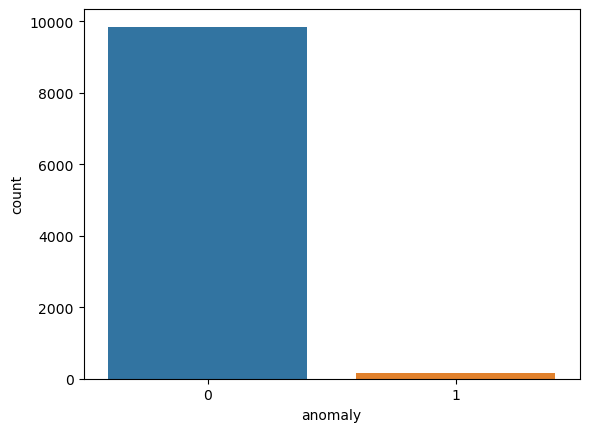

In [25]:
sns.countplot(x = "anomaly", data = data)
plt.show()

In [26]:
data["devicetime"].nunique()

9942

In [27]:
data["anomaly_data"].nunique()

2

In [29]:
data["latitude"].nunique()

1383

In [30]:
data["longitude"].nunique()

1314

In [31]:
data["ac_lat"].nunique()

147

In [32]:
data["angle_volante"].nunique()

337

In [33]:
data["yaw_rate"].nunique()

54

In [28]:
data.drop(columns=["devicetime","anomaly_data"],inplace=True)
data

,latitude,longitude,ac_lat,angle_volante,yaw_rate,rpm,score,anomaly
0,-226073033,-688120083,0.39,0.22,0.00,1338,8690032754,0
1,-226068333,-688119233,-0.53,0.16,0.00,1341,10247354139,0
2,-226068333,-688119233,-0.55,0.08,0.00,1327,10578514242,0
3,-226063566,-688118583,0.02,0.08,0.00,1328,7904928679,0
4,-226061183,-688118216,-0.69,0.06,0.00,1338,11908699615,0
...,...,...,...,...,...,...,...,...
9995,-224378333,-689005766,-0.49,-4.97,-0.09,900,9808135297,0
9996,-224378583,-6890058,-0.63,-5.65,-0.11,1043,11011281546,0
9997,-224378866,-689005866,-0.95,-6.80,-0.17,1162,18760190913,1
9998,-224379133,-689006016,-1.15,-8.27,-0.24,1310,2298647254,1


In [36]:
data.iloc[:,0:8].head().describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,5.0,-2.260669e+08,4.623845e+03,-2.260730e+08,-2.260683e+08,-2.260683e+08,-2.260636e+08,-2.260612e+08
longitude,5.0,-6.881191e+08,7.151558e+02,-6.881201e+08,-6.881192e+08,-6.881192e+08,-6.881186e+08,-6.881182e+08
ac_lat,5.0,-2.720000e-01,4.588246e-01,-6.900000e-01,-5.500000e-01,-5.300000e-01,2.000000e-02,3.900000e-01
angle_volante,5.0,1.200000e-01,6.782330e-02,6.000000e-02,8.000000e-02,8.000000e-02,1.600000e-01,2.200000e-01
yaw_rate,5.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
rpm,5.0,1.334400e+03,6.426508e+00,1.327000e+03,1.328000e+03,1.338000e+03,1.338000e+03,1.341000e+03
score,5.0,9.865906e+09,1.585436e+09,7.904929e+09,8.690033e+09,1.024735e+10,1.057851e+10,1.190870e+10
anomaly,5.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


2. DATA VISUALIZATION

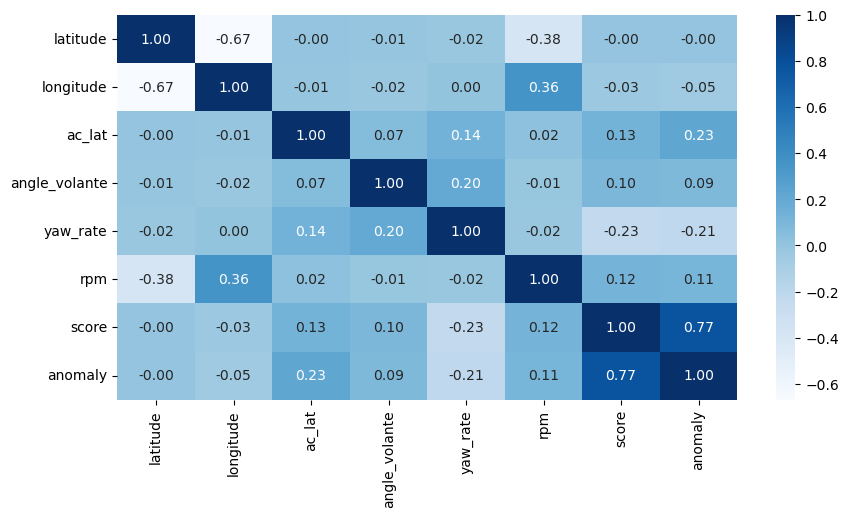

In [37]:
fig, ax = plt.subplots(figsize=(10,5))   
sns.heatmap(data.corr(), annot = True , fmt=".2f",ax=ax ,cmap = "Blues")
plt.show()

C:\ANACONDA\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


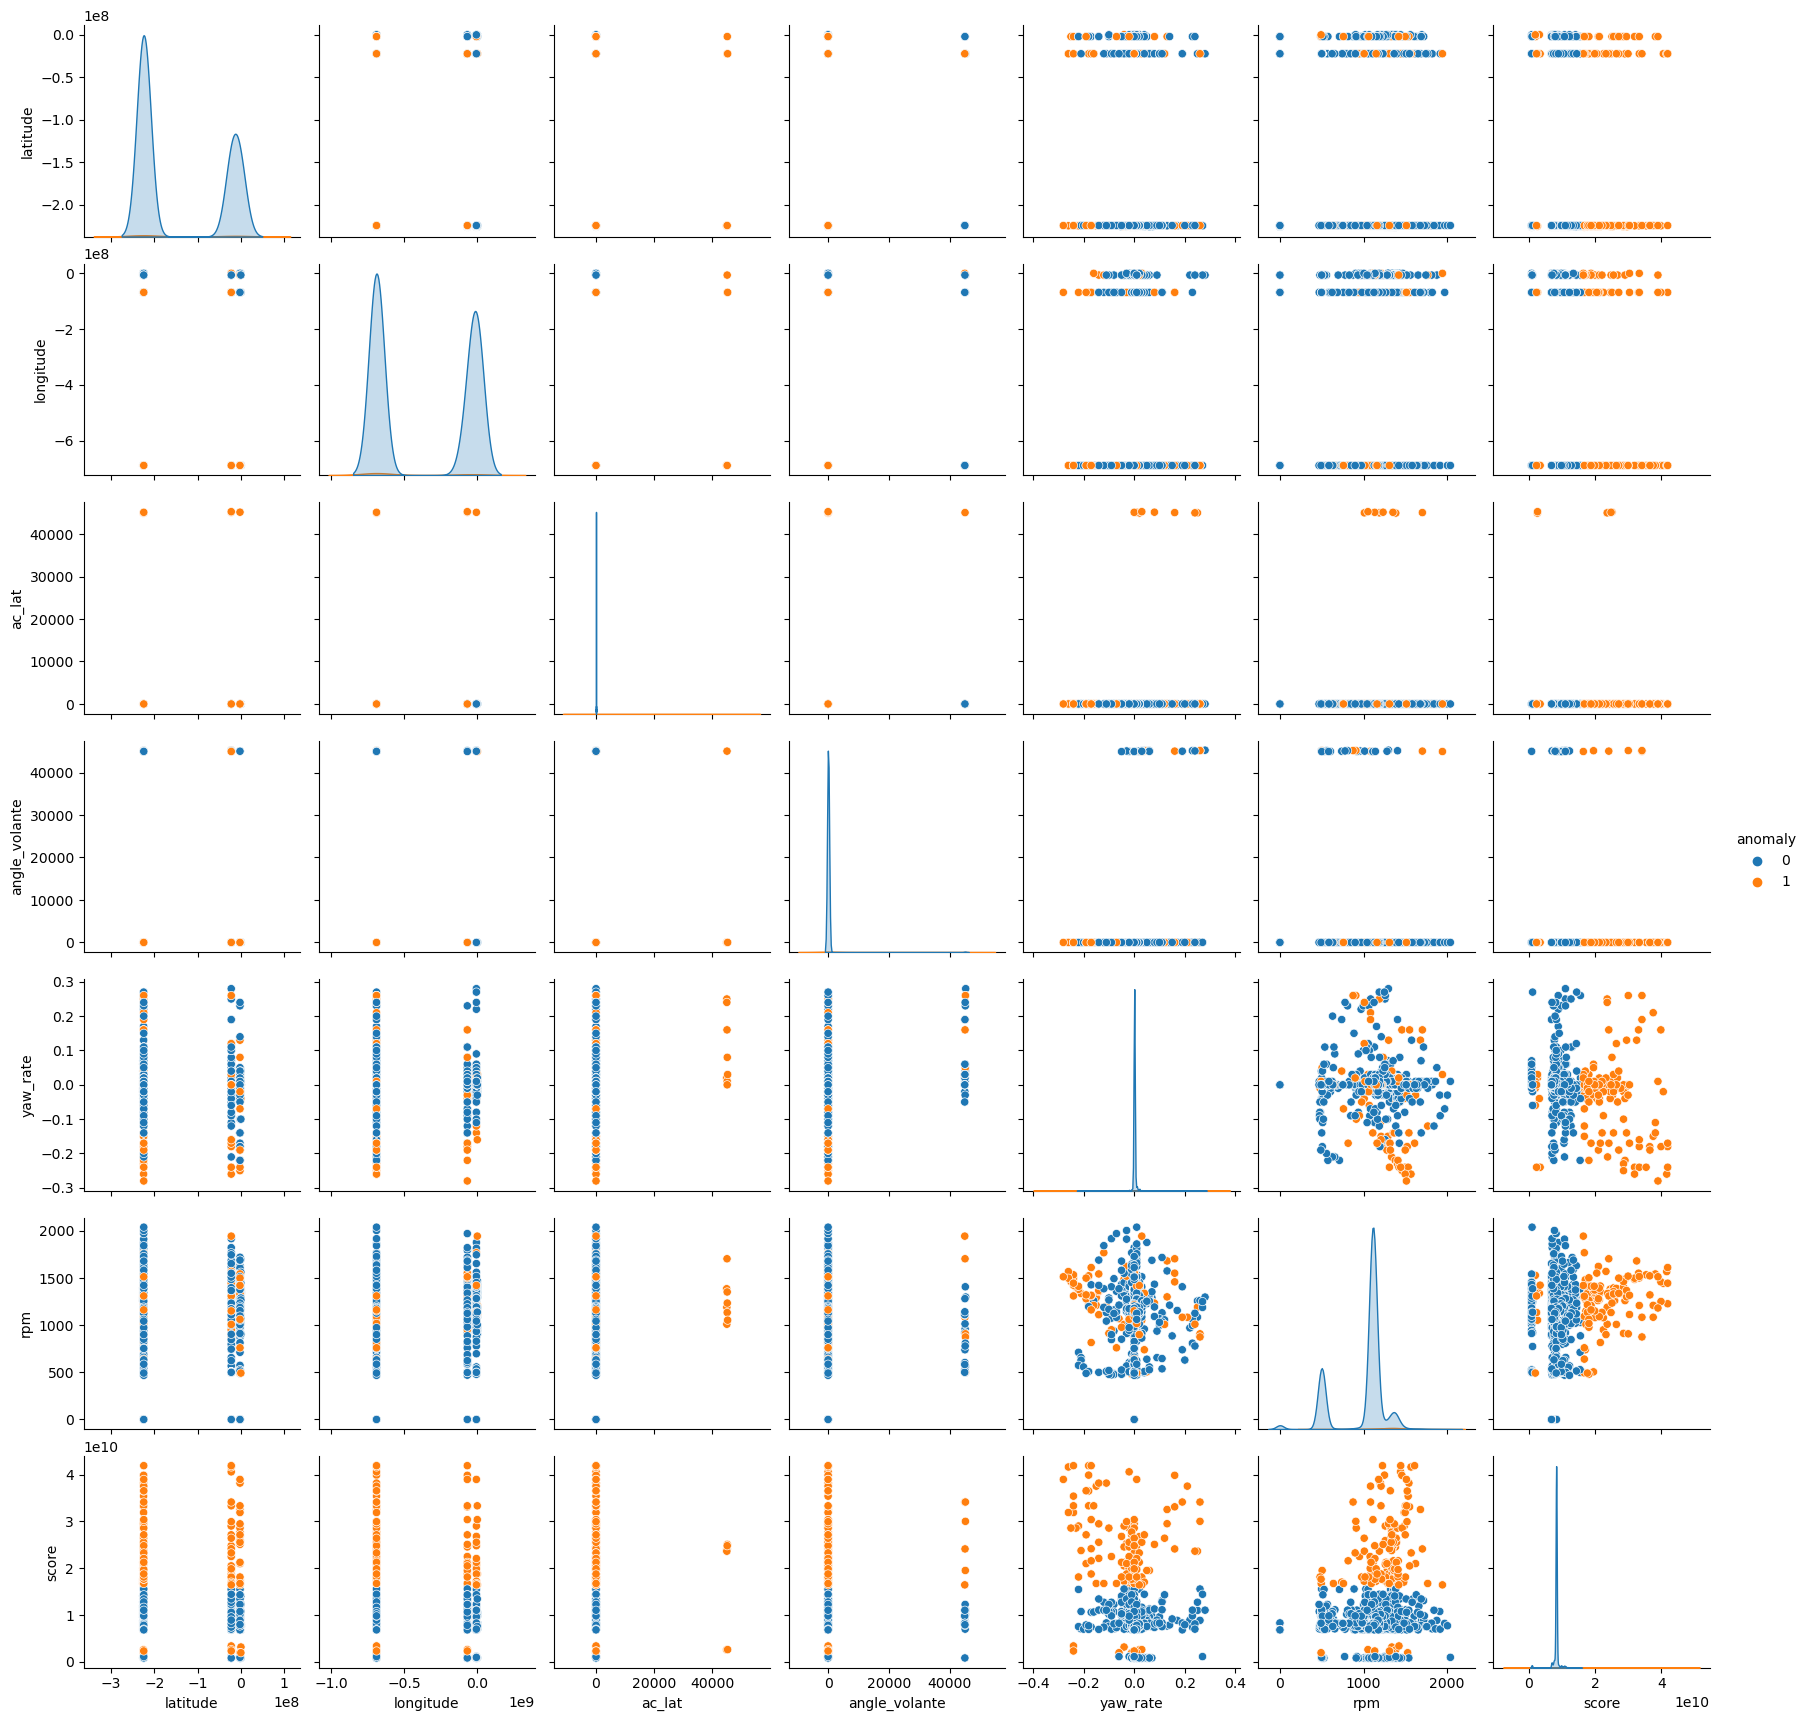

In [44]:
sns.pairplot(data, hue="anomaly")
plt.show()

C:\ANACONDA\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


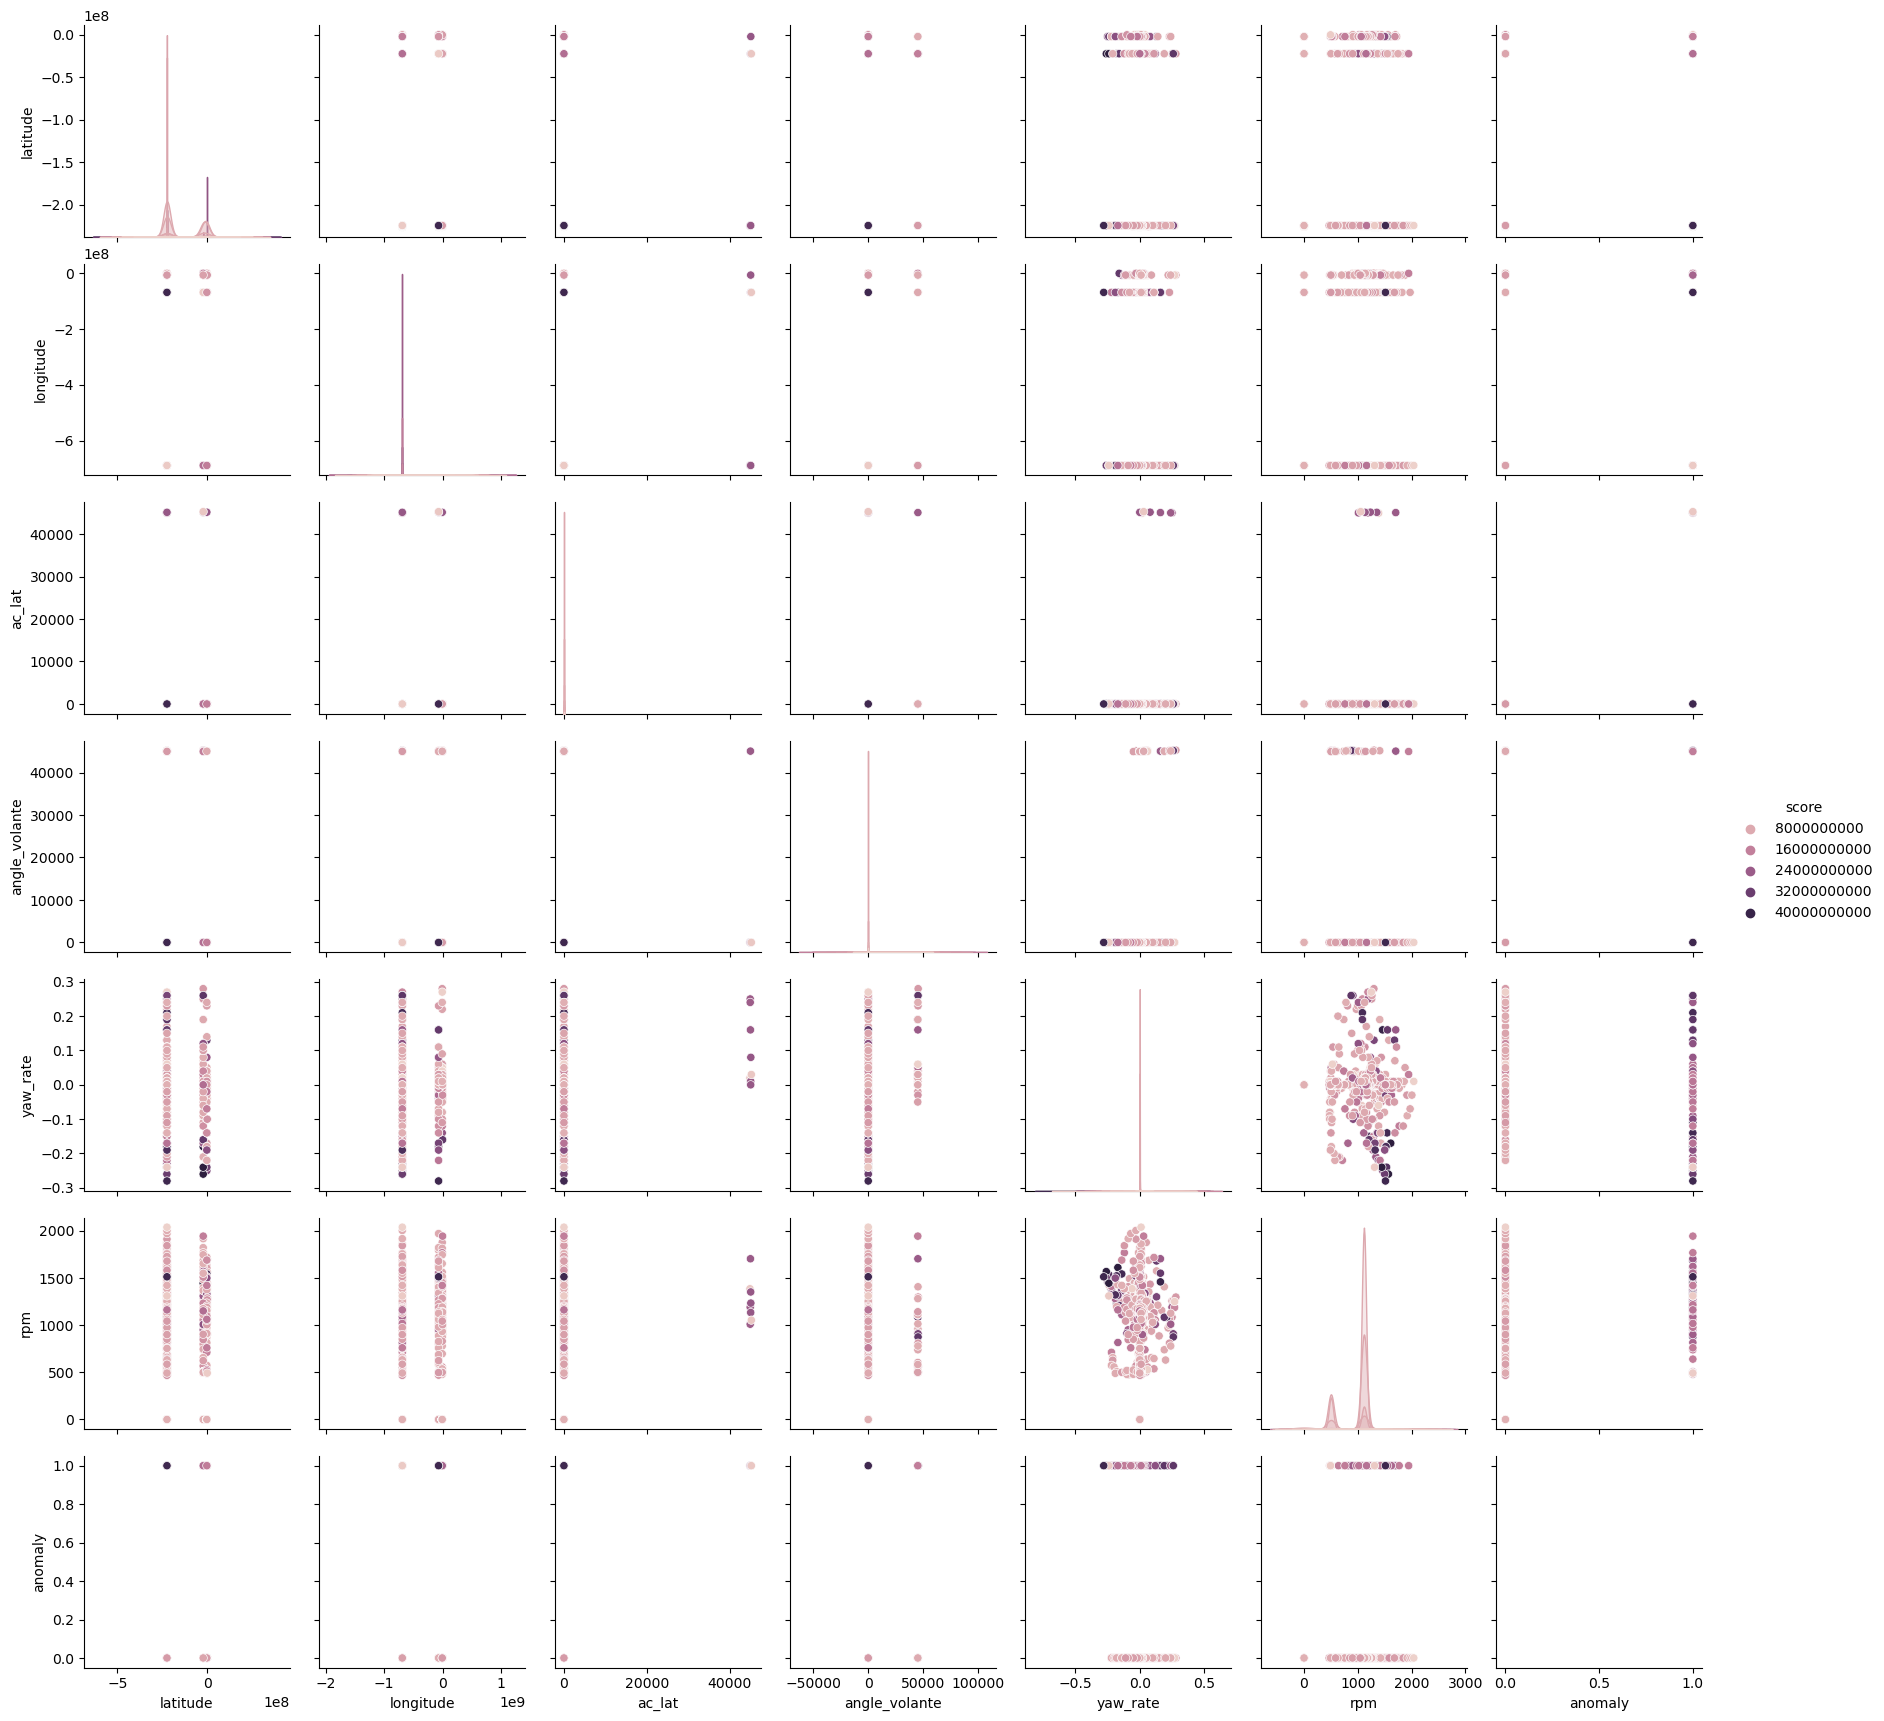

In [45]:
sns.pairplot(data, hue="score")
plt.show()

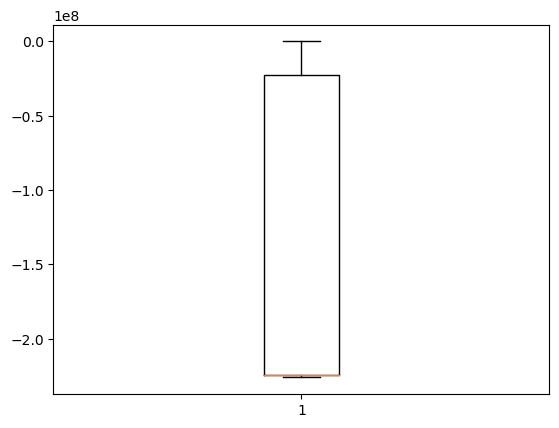

In [46]:
plt.boxplot(data["latitude"])
plt.show()

3. FEATURE ENGINEERING

In [50]:
data = pd.read_csv("C:/Users/Jhan/OneDrive/Escritorio/UNASAM (JHAN)/2024-0/TEORIA DE DESICIONES/nuevoexel.csv", sep=';')

In [51]:
data

,devicetime,latitude,longitude,ac_lat,angle_volante,yaw_rate,rpm,score,anomaly,anomaly_data
0,2022-12-04 00:32:58.000,-226073033,-688120083,0.39,0.22,0.00,1338,8690032754,0,No
1,2022-12-04 00:32:59.000,-226068333,-688119233,-0.53,0.16,0.00,1341,10247354139,0,No
2,2022-12-04 00:33:00.000,-226068333,-688119233,-0.55,0.08,0.00,1327,10578514242,0,No
3,2022-12-04 00:33:01.000,-226063566,-688118583,0.02,0.08,0.00,1328,7904928679,0,No
4,2022-12-04 00:33:02.000,-226061183,-688118216,-0.69,0.06,0.00,1338,11908699615,0,No
...,...,...,...,...,...,...,...,...,...,...
9995,2022-12-04 08:12:57.000,-224378333,-689005766,-0.49,-4.97,-0.09,900,9808135297,0,No
9996,2022-12-04 08:12:58.000,-224378583,-6890058,-0.63,-5.65,-0.11,1043,11011281546,0,No
9997,2022-12-04 08:12:59.000,-224378866,-689005866,-0.95,-6.80,-0.17,1162,18760190913,1,Yes
9998,2022-12-04 08:13:00.000,-224379133,-689006016,-1.15,-8.27,-0.24,1310,2298647254,1,Yes


In [53]:
data = pd.get_dummies(data, columns= ["anomaly_data"])
data.head()

,devicetime,latitude,longitude,ac_lat,angle_volante,yaw_rate,rpm,score,anomaly,anomaly_data_No,anomaly_data_Yes
0,2022-12-04 00:32:58.000,-226073033,-688120083,0.39,0.22,0.0,1338,8690032754,0,True,False
1,2022-12-04 00:32:59.000,-226068333,-688119233,-0.53,0.16,0.0,1341,10247354139,0,True,False
2,2022-12-04 00:33:00.000,-226068333,-688119233,-0.55,0.08,0.0,1327,10578514242,0,True,False
3,2022-12-04 00:33:01.000,-226063566,-688118583,0.02,0.08,0.0,1328,7904928679,0,True,False
4,2022-12-04 00:33:02.000,-226061183,-688118216,-0.69,0.06,0.0,1338,11908699615,0,True,False


In [54]:
print("Max rpm: ", data['rpm'].max())
print("Min rpm: ", data['rpm'].min())

Max rpm:  2039
Min rpm:  0


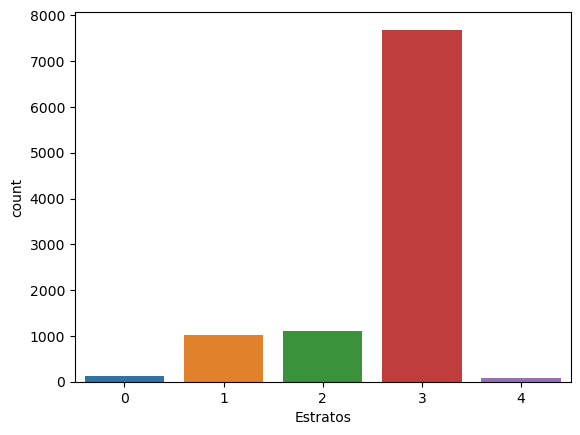

In [58]:
rpm_cat = [0 if i < 200 else 1 if i < 500  else 2 if i < 1000 else 3 if i < 1500 else 4 for i in data["rpm"]]
data["Estratos"] = rpm_cat

sns.countplot(x = "Estratos", data = data)
plt.show()

C:\ANACONDA\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


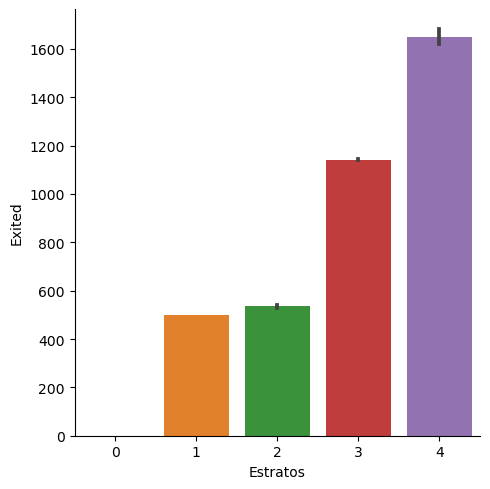

In [61]:
g = sns.catplot(x = "Estratos", y = "rpm", data = data, kind = "bar")
g.set_ylabels("Exited")
plt.show()

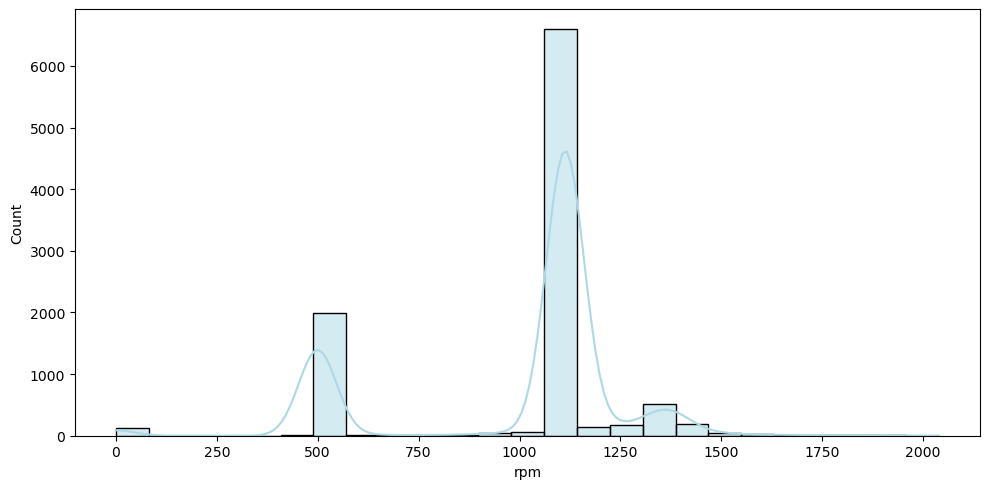

In [62]:
fig,ax=plt.subplots(figsize=(10,5))
sns.histplot(data["rpm"],bins=25,kde=True,color="lightblue",ax=ax)
plt.tight_layout()
plt.show()

In [64]:
data["Estratos"] = data["Estratos"].astype("category")
data = pd.get_dummies(data, columns=["Estratos"])
data.head(10)

,devicetime,latitude,longitude,ac_lat,angle_volante,yaw_rate,rpm,score,anomaly,anomaly_data_No,anomaly_data_Yes,Estratos_0,Estratos_1,Estratos_2,Estratos_3,Estratos_4
0,2022-12-04 00:32:58.000,-226073033,-688120083,0.39,0.22,0.00,1338,8690032754,0,True,False,False,False,False,True,False
1,2022-12-04 00:32:59.000,-226068333,-688119233,-0.53,0.16,0.00,1341,10247354139,0,True,False,False,False,False,True,False
2,2022-12-04 00:33:00.000,-226068333,-688119233,-0.55,0.08,0.00,1327,10578514242,0,True,False,False,False,False,True,False
3,2022-12-04 00:33:01.000,-226063566,-688118583,0.02,0.08,0.00,1328,7904928679,0,True,False,False,False,False,True,False
4,2022-12-04 00:33:02.000,-226061183,-688118216,-0.69,0.06,0.00,1338,11908699615,0,True,False,False,False,False,True,False
5,2022-12-04 00:33:03.000,-2260588,-688117816,0.14,0.12,0.00,1354,805087239,0,True,False,False,False,False,True,False
6,2022-12-04 00:33:04.000,-22605645,-6881174,-0.08,0.12,0.00,1353,7512313795,0,True,False,False,False,False,True,False
7,2022-12-04 00:33:05.000,-226054083,-688117016,-0.08,-0.14,0.00,1359,7512313795,0,True,False,False,False,False,True,False
8,2022-12-04 00:33:06.000,-226051716,-68811665,-0.87,-0.26,-0.01,1363,16731453676,1,False,True,False,False,False,True,False
9,2022-12-04 00:33:07.000,-226049283,-688116366,-0.51,0.19,0.00,1367,10134247691,0,True,False,False,False,False,True,False


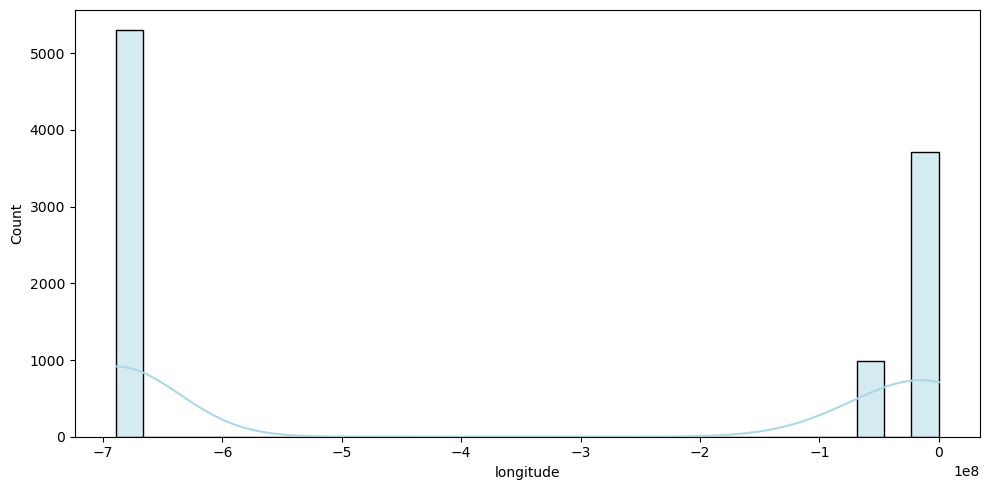

In [70]:
fig,ax=plt.subplots(figsize=(10,5))
sns.histplot(data,x=data["longitude"],bins=30,kde=True,color="lightblue",ax=ax)
plt.tight_layout()
plt.show()